In [8]:
# Download the data file if doesn't exist already

import os
import requests # This library is used to make requests to internet
import zipfile

data_file = "data/SMSSpamCollection"

#Download and unzip the data file in data directory in case it doesn't exists already
if not os.path.exists(data_file):
    data_file_dir = os.path.dirname(data_file)
    if not os.path.exists(data_file_dir): os.makedirs(data_file_dir)

    # We are storing url of dataset
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
    r = requests.get(url, allow_redirects=True)
    zip_file_download = data_file_dir + '/smsspamcollection.zip'

    # We are writing the content of above request to 'iris.data' file
    open(zip_file_download, 'wb').write(r.content)
    
    #Extract the zip file
    with zipfile.ZipFile(zip_file_download,"r") as zip_ref:
        zip_ref.extractall(data_file_dir)


In [9]:
from util import load_data_and_labels_from_csv_file, build_vocab, pad_sentences, text_to_sequence, save_vocab_json, generate_word_level_features

print("Loading data...")
labels, sentences = load_data_and_labels_from_csv_file(data_file)

print(labels[:5])
print(sentences[:5])

Loading data...
[0 0 1 0 0]
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]


In [11]:
import numpy as np

# Param defining max features consider in a sentence
params = {'max_words_features': 500} 

# Generate word features for every message
lines_words_level_features = generate_word_level_features(sentences, params['max_words_features'])
# Redefine the max_words_features in case existing data contains the 
# max word featues less then define one for all the messages
params['max_words_features'] = max([len(lines) for lines in lines_words_level_features])

# Convert to numpy array
lines_words_level_features = np.array(lines_words_level_features)


In [47]:
# Build vocabulary
print("Build the vocabulary")
vocabulary = build_vocab(lines_words_level_features, max_vocab_size=10000)

import itertools 
#list(vocabulary)[:10]
for i, val in enumerate(itertools.islice(vocabulary, 10)):
    print(i, val, vocabulary[val])

Build the vocabulary
0 <UNK/> [0, inf]
1 <PAD/> [1, inf]
2 to [2, 4]
3 <n/> [3, 3]
4 entry [4, 2]
5 fa [5, 2]
6 free [6, 1]
7 in [7, 1]
8 a [8, 1]
9 wkly [9, 1]


In [18]:
# Pad sentence
print("Padding sentences...")
x_text = pad_sentences(lines_words_level_features, max_sequence_length=params['max_words_features'])

# Get max sequence length, should be equal to max_words_features
seq_len = len(x_text[0]) 
print("The sequence length is: ", seq_len)
x_text[:1]

Padding sentences...
The sequence length is:  171


[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<PAD/>',
  '<P

In [19]:
# Represent sentence with word index, using word index to represent a sentence
x = text_to_sequence(x_text, vocabulary)
x[:1]

array([[  50,  446, 4102,  787,  705,  676,   68,   10, 1239,   90,  125,
         363, 1240,  150, 2796, 1241,   70,   60, 4103,  141,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1, 

In [20]:
# Shuffle data
np.random.seed(1) #same shuffling each time
shuffle_indices = np.random.permutation(np.arange(len(labels)))
x = x[shuffle_indices]
labels = labels[shuffle_indices]

In [21]:
import keras
from keras.layers import Embedding, Reshape, Conv2D, MaxPool2D, Concatenate, Flatten, Dropout, Dense
from keras.models import Input, Model

"""
## Build CNN model
"""
vocab_size_or_total_features = len(vocabulary) 

embed_dim = 300 
filter_sizes = [3,4,5]
num_filters = 512
drop_out = 0.5

# this returns a tensor
print("Creating Model...")
inputs = Input(shape=(seq_len,), dtype='int32')
embedding = Embedding(input_dim=vocab_size_or_total_features, output_dim=embed_dim, input_length=seq_len)(inputs)
reshape = Reshape((seq_len,embed_dim,1))(embedding)

conv0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
maxpool0 = MaxPool2D(pool_size=(seq_len - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv0)
conv1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
maxpool1 = MaxPool2D(pool_size=(seq_len - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv1)
conv2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
maxpool2 = MaxPool2D(pool_size=(seq_len - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv2)

concatenate_maxpool = Concatenate(axis=1)([maxpool0, maxpool1, maxpool2])
flatten = Flatten()(concatenate_maxpool)
dropout = Dropout(drop_out)(flatten)
output = Dense(units=1, activation='sigmoid')(dropout)

model = Model(inputs=inputs, outputs=output) # Create model
model.summary()


Creating Model...
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 171)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 171, 300)     2598900     input_1[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 171, 300, 1)  0           embedding[0][0]                  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 169, 1, 512)  461312      reshape[0][0]                    
_____________________________________________________________________

In [31]:
from keras.callbacks import ModelCheckpoint 
from keras.optimizers import Adam

checkpoint_path = "model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create check_point dir if not already exists
if not os.path.exists(checkpoint_dir): os.makedirs(checkpoint_dir)

    # Save Vocabulary in checkpoint directory
vocab_file = checkpoint_dir + "/vocab.json"
save_vocab_json(vocab_file, vocabulary, params)

checkpoint = ModelCheckpoint(filepath=checkpoint_path,  monitor='accuracy', verbose=1, save_best_only=True, mode='auto') # Create callback to save the weights
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=checkpoint_dir, histogram_freq=0)
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Paameters
epochs = 5
batch_size = 32
verbose = 1
validation_split = 0.2
print("Traning Model...")
history = model.fit(x, labels, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=validation_split, callbacks=[checkpoint, tensorboard_callback])

Traning Model...
Epoch 1/5
140/140 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9966
Epoch 00001: accuracy improved from -inf to 0.99664, saving model to model/cp.ckpt
INFO:tensorflow:Assets written to: model/cp.ckpt/assets
140/140 [==============================] - 36s 260ms/step - loss: 0.0134 - accuracy: 0.9966 - val_loss: 0.0121 - val_accuracy: 0.9973
Epoch 2/5
140/140 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9984
Epoch 00002: accuracy improved from 0.99664 to 0.99843, saving model to model/cp.ckpt
INFO:tensorflow:Assets written to: model/cp.ckpt/assets
140/140 [==============================] - 56s 403ms/step - loss: 0.0085 - accuracy: 0.9984 - val_loss: 0.0117 - val_accuracy: 0.9964
Epoch 3/5
140/140 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9987
Epoch 00003: accuracy improved from 0.99843 to 0.99865, saving model to model/cp.ckpt
INFO:tensorflow:Assets written to: model/cp.ckpt/assets
140/140

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


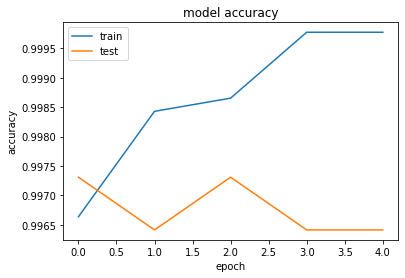

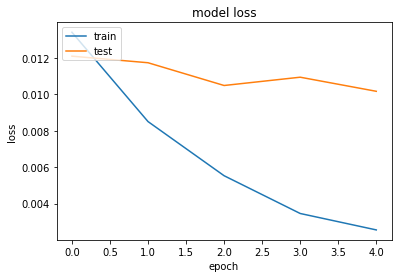

In [33]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# Prediction of given text

x_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 
          "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

lines_words_level_features = generate_word_level_features(x_text, params['max_words_features'])
lines_words_level_features = np.array(lines_words_level_features)

seq_len = params['max_words_features'] 

x = pad_sentences(lines_words_level_features, max_sequence_length=seq_len, is_max_sequence_length_modifiable=False)
x = text_to_sequence(x, vocabulary)

print("Generate predictions")
predictions = model.predict(x)
count = 0 
for text in x_text:
    print("Text is: \t", text)
    if (predictions[count] > 0.5):
        print("predicted spam with spam prob ", predictions[count])
    else:
        print("predicted ham with spam prob ", predictions[count])
    count += 1 


Generate predictions
Text is: 	 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
predicted spam with spam prob  [0.9999779]
Text is: 	 I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
predicted ham with spam prob  [0.00092956]
